In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori as apr
from mlxtend.frequent_patterns import association_rules

In [4]:
df = pd.read_csv(r"C:\Users\Jwpel\Documents\Groceries_dataset.csv", sep = ',', encoding = "latin1")

In [5]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,5/1/2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12/12/2015,other vegetables
4,3037,1/2/2015,whole milk


In [6]:
df.shape

(38765, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [7]:
# convert date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df.head()

,Member_number,Date,itemDescription
0,1808,2015-07-21,tropical fruit
1,2552,2015-05-01,whole milk
2,2300,2015-09-19,pip fruit
3,1187,2015-12-12,other vegetables
4,3037,2015-01-02,whole milk


In [9]:
# 20 most frequent items
itemcounts = df["itemDescription"].value_counts()
top_20_items = itemcounts.head(20)
top_20_items

whole milk            2502
other vegetables      1898
rolls/buns            1716
soda                  1514
yogurt                1334
root vegetables       1071
tropical fruit        1032
bottled water          933
sausage                924
citrus fruit           812
pastry                 785
pip fruit              744
shopping bags          731
canned beer            717
bottled beer           687
whipped/sour cream     662
newspapers             596
frankfurter            580
brown bread            571
pork                   566
Name: itemDescription, dtype: int64

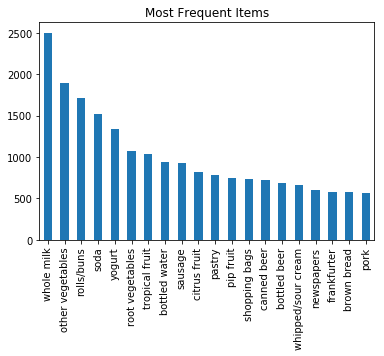

In [30]:
top_20_items.plot(kind='bar')
plt.title("Most Frequent Items")
plt.show()

In [11]:
df["Member_number"].value_counts()

3180    36
3050    33
2051    33
3737    33
2433    31
        ..
4565     2
2373     2
3788     2
2614     2
2844     2
Name: Member_number, Length: 3898, dtype: int64

In [12]:
# binarization of transactions
item = pd.get_dummies(df["itemDescription"])

In [13]:
item.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [14]:
item.shape

(38765, 167)

In [16]:
# concatenate binary values on to dataframe
df2 = pd.concat([df, item], axis = 1)

In [17]:
df3 = df2

In [33]:
# index the new dataframe by Member Number and Data and rename them idx1 and idx2
df3.index = pd.MultiIndex.from_arrays(df3[['Member_number', 'Date']].values.T, names=['idx1', 'idx2'])

In [34]:
df3.head()

,,Member_number,Date,itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
idx1,idx2,,,,,,,,,,,,,,,,,,,,,
1808,2015-07-21,1808,2015-07-21,tropical fruit,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2552,2015-05-01,2552,2015-05-01,whole milk,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2300,2015-09-19,2300,2015-09-19,pip fruit,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1187,2015-12-12,1187,2015-12-12,other vegetables,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3037,2015-01-02,3037,2015-01-02,whole milk,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [35]:
df3.shape

(38765, 170)

In [36]:
# drop redundant columns 
df4 = df3.drop(['Member_number', 'Date', 'itemDescription'], axis = 1)

In [37]:
df4.head()

,,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
idx1,idx2,,,,,,,,,,,,,,,,,,,,,
1808,2015-07-21,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2552,2015-05-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2300,2015-09-19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1187,2015-12-12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3037,2015-01-02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [38]:
# reset index to groupby
df4.reset_index()

,idx1,idx2,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,1808,2015-07-21,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2552,2015-05-01,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2300,2015-09-19,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1187,2015-12-12,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3037,2015-01-02,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38760,4471,2014-08-10,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38761,2022,2014-02-23,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38762,1097,2014-04-16,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38763,1510,2014-03-12,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
# groupby member and date by sum
df5 = df4.groupby(['idx1','idx2']).sum()

In [40]:
df5.shape

(14963, 167)

In [41]:
df5.head

<bound method NDFrame.head of                  Instant food products  UHT-milk  abrasive cleaner  \
idx1 idx2                                                            
1000 2014-06-24                      0         0                 0   
     2015-03-15                      0         0                 0   
     2015-05-27                      0         0                 0   
     2015-07-24                      0         0                 0   
     2015-11-25                      0         0                 0   
...                                ...       ...               ...   
4999 2015-05-16                      0         0                 0   
     2015-12-26                      0         0                 0   
5000 2014-09-03                      0         0                 0   
     2014-11-16                      0         0                 0   
     2015-10-02                      0         0                 0   

                 artif. sweetener  baby cosmetics  bags  ba

In [28]:
# there are values greater than one, must convert 
df5.describe()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
count,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,...,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000
mean,0.004010,0.021587,0.001470,0.001938,0.000200,0.000267,0.008153,0.001136,0.034485,0.021854,...,0.005347,0.003408,0.018713,0.044242,0.000535,0.024193,0.011762,0.167212,0.089153,0.004010
std,0.063199,0.146707,0.038317,0.043983,0.014159,0.016348,0.090671,0.033689,0.185385,0.146668,...,0.072927,0.058284,0.136985,0.208224,0.023117,0.154953,0.108436,0.398805,0.296695,0.063199
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,...,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,4.000000,3.000000,1.000000


In [42]:
# replacing values greater than 1 with 1
df6 = df5.replace(to_replace = [2,3,4,5,6], value=[1,1,1,1,1])
df6.describe()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
count,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,...,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000,14963.000000
mean,0.004010,0.021386,0.001470,0.001938,0.000200,0.000267,0.008087,0.001136,0.033950,0.021787,...,0.005347,0.003408,0.018512,0.043708,0.000535,0.023993,0.011696,0.157923,0.085879,0.004010
std,0.063199,0.144672,0.038317,0.043983,0.014159,0.016348,0.089564,0.033689,0.181108,0.145993,...,0.072927,0.058284,0.134799,0.204451,0.023117,0.153031,0.107515,0.364681,0.280194,0.063199
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
# creating frequent item dataset with minimum support of .0003
freq_items = apr(df6, min_support = .00030, use_colnames = True, max_len=4)
freq_items.head()

,support,itemsets
0,0.004010,(Instant food products)
1,0.021386,(UHT-milk)
2,0.001470,(abrasive cleaner)
3,0.001938,(artif. sweetener)
4,0.008087,(baking powder)


In [44]:
# creating apriori rules with the frequent items, by mimimum confidence of .05
rules = association_rules(freq_items, metric="confidence", min_threshold=0.05)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Instant food products),(rolls/buns),0.004010,0.110005,0.000401,0.100000,0.909052,-0.000040,0.988884
1,(Instant food products),(root vegetables),0.004010,0.069572,0.000401,0.100000,1.437368,0.000122,1.033809
2,(Instant food products),(whole milk),0.004010,0.157923,0.000535,0.133333,0.844294,-0.000099,0.971627
3,(Instant food products),(yogurt),0.004010,0.085879,0.000334,0.083333,0.970363,-0.000010,0.997223
4,(UHT-milk),(bottled water),0.021386,0.060683,0.001069,0.050000,0.823954,-0.000228,0.988755
...,...,...,...,...,...,...,...,...,...
1746,"(sausage, whole milk, yogurt)",(rolls/buns),0.001470,0.110005,0.000334,0.227273,2.066028,0.000172,1.151759
1747,"(sausage, rolls/buns, yogurt)",(whole milk),0.000601,0.157923,0.000334,0.555556,3.517892,0.000239,1.894674
1748,"(whole milk, rolls/buns, yogurt)",(sausage),0.001337,0.060349,0.000334,0.250000,4.142580,0.000253,1.252868
1749,"(sausage, rolls/buns)","(whole milk, yogurt)",0.005347,0.011161,0.000334,0.062500,5.599925,0.000274,1.054762


In [45]:
rules.describe()

,antecedent support,consequent support,support,confidence,lift,leverage,conviction
count,1751.000000,1751.000000,1751.000000,1751.000000,1751.000000,1751.000000,1751.000000
mean,0.012609,0.092297,0.001059,0.107874,1.306417,-0.000110,1.023863
std,0.018744,0.039735,0.001530,0.064365,0.863357,0.000501,0.126063
min,0.000401,0.007084,0.000334,0.050000,0.398879,-0.004446,0.898687
25%,0.003676,0.060349,0.000334,0.066667,0.834274,-0.000172,0.981482
50%,0.005948,0.085879,0.000468,0.088447,1.057029,0.000033,1.004863
75%,0.013700,0.122101,0.001002,0.125000,1.475297,0.000149,1.035077
max,0.157923,0.157923,0.014837,0.833333,14.704206,0.000908,5.052463


In [46]:
# filtering results by lift >= 3
rules2 = rules[(rules['lift'] >= 3)]

In [47]:
rules2.shape

(71, 9)

In [48]:
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
414,(liver loaf),(fruit/vegetable juice),0.003342,0.034017,0.000401,0.120000,3.527623,0.000287,1.097708
433,(pickled vegetables),(ham),0.008955,0.017109,0.000535,0.059701,3.489506,0.000381,1.045297
522,(roll products ),(meat),0.005480,0.016842,0.000334,0.060976,3.620548,0.000242,1.047000
533,(salt),(misc. beverages),0.005948,0.015772,0.000334,0.056180,3.561941,0.000240,1.042813
536,(spread cheese),(misc. beverages),0.006683,0.015772,0.000334,0.050000,3.170127,0.000229,1.036029
...,...,...,...,...,...,...,...,...,...
1745,"(sausage, whole milk, rolls/buns)",(yogurt),0.001136,0.085879,0.000334,0.294118,3.424811,0.000237,1.295005
1747,"(sausage, rolls/buns, yogurt)",(whole milk),0.000601,0.157923,0.000334,0.555556,3.517892,0.000239,1.894674
1748,"(whole milk, rolls/buns, yogurt)",(sausage),0.001337,0.060349,0.000334,0.250000,4.142580,0.000253,1.252868
1749,"(sausage, rolls/buns)","(whole milk, yogurt)",0.005347,0.011161,0.000334,0.062500,5.599925,0.000274,1.054762


In [49]:
with pd.option_context("display.max_rows", 100):
    display(rules2)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
414,(liver loaf),(fruit/vegetable juice),0.003342,0.034017,0.000401,0.120000,3.527623,0.000287,1.097708
433,(pickled vegetables),(ham),0.008955,0.017109,0.000535,0.059701,3.489506,0.000381,1.045297
522,(roll products ),(meat),0.005480,0.016842,0.000334,0.060976,3.620548,0.000242,1.047000
533,(salt),(misc. beverages),0.005948,0.015772,0.000334,0.056180,3.561941,0.000240,1.042813
536,(spread cheese),(misc. beverages),0.006683,0.015772,0.000334,0.050000,3.170127,0.000229,1.036029
786,(soups),(seasonal products),0.003208,0.007084,0.000334,0.104167,14.704206,0.000311,1.108371
841,(spread cheese),(sugar),0.006683,0.017710,0.000401,0.060000,3.387849,0.000283,1.044989
897,"(sausage, butter)",(bottled beer),0.001938,0.045312,0.000334,0.172414,3.805055,0.000246,1.153582
898,"(bottled beer, butter)",(sausage),0.001671,0.060349,0.000334,0.200000,3.314064,0.000233,1.174564
917,"(whole milk, hard cheese)",(bottled beer),0.001871,0.045312,0.000334,0.178571,3.940950,0.000249,1.162229
